## Apple or Orange

This is just practice to write an image classifier from scratch. Let'd do it!!!

### Step 1: Get Images

In [1]:
from duckduckgo_search import ddg_images

In [2]:
from fastcore import *

# I forget where the L structure comes from, going without for now...
def get_urls(search_term, max_n=30):
    return [item["image"] for item in ddg_images(search_term, max_results=max_n)]

In [5]:
from pathlib import Path
from fastai.vision.all import download_images
from time import sleep

categories = ["orange fruit", "apple"]
top_level_folder = Path.home()/'data/apple-or-orange'

if not top_level_folder.exists():
    top_level_folder.mkdir()
    for category in categories:
        cat_path = top_level_folder/category
        cat_path.mkdir()
        urls = get_urls(category)
        download_images(dest=cat_path, urls=urls)
        sleep(10)

## Step 2: Create Dataloader

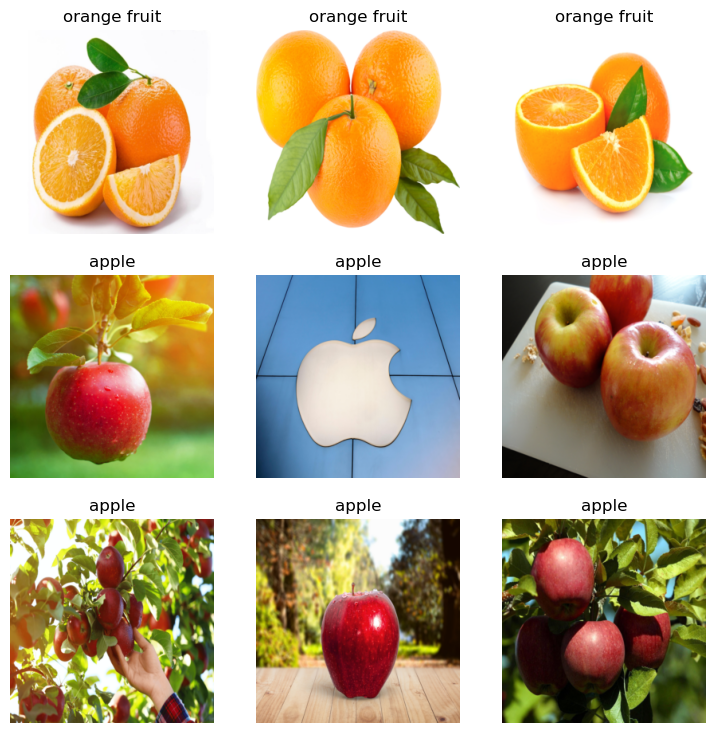

In [9]:
from fastai.vision.all import *

# Had to look up API for Datablock
dls = DataBlock(
    blocks = [ImageBlock, CategoryBlock], # not sure if ImageBlock is correct
    get_items = get_image_files,
    item_tfms = Resize(256, method='squish'),
    get_y = parent_label,
    splitter = RandomSplitter(valid_pct=0.2, seed=42)
).dataloaders(top_level_folder, bs=10)

dls.show_batch()

## Verify Images, Delete Bad Ones

In [10]:
# Note: this should have been done _before_ initializing the DataLoader.

# This is not the way I've done it before (using get_image_files) but it seems to work...

image_files = get_image_files(top_level_folder)
bad_images = verify_images(image_files)
print(bad_images)

# non-idomatic way to do this, can't remember how it was done before...
for path in bad_images:
    path.unlink()
    
# something like this...
# bad_images.map(Path.unlink)

[]


## Load Up Dat Model

In [11]:
learner = vision_learner(dls, resnet18, metrics=error_rate)
learner.fine_tune(5)

epoch,train_loss,valid_loss,error_rate,time
0,0.850115,0.618209,0.363636,00:04


epoch,train_loss,valid_loss,error_rate,time
0,0.290275,0.161696,0.000000,00:03
1,0.250516,0.030760,0.000000,00:03
2,0.237240,0.014098,0.000000,00:03
3,0.181792,0.018921,0.000000,00:03
4,0.155457,0.026688,0.000000,00:03


## Try Out The Model

https://i.pinimg.com/736x/05/79/5a/05795a16b647118ffb6629390e995adb.jpg


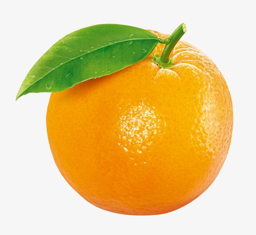

In [12]:
from fastdownload import download_url

test_path = top_level_folder/'test.jpg'

url = get_urls("orange fruit", 50)[49]
print(url)
download_url(dest=test_path, url=url)
Image.open(test_path).to_thumb(256)


In [13]:
image = PILImage.create(test_path)
learner.predict(image)

('orange fruit', TensorBase(1), TensorBase([0.0019, 0.9981]))

11/29/2022 - Got this done in about 50 minutes, really stumbled after "Try Out The Model" because I forgot those apis and rushed myself. Solid job though!!!